# Optimizing Patient Scheduling with Binomial Probability

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/noportman/mitxpro/blob/main/files/prescriptive_data.ipynb)

![Python](https://img.shields.io/badge/Python-3.10-blue)
![SciPy](https://img.shields.io/badge/SciPy-Scientific%20Computing-blue?logo=scipy)
![Binomial Distribution](https://img.shields.io/badge/Stats-Binomial%20Dist-orange)
![Matplotlib](https://img.shields.io/badge/Matplotlib-Data%20Viz-blue?logo=matplotlib)

![Status](https://img.shields.io/badge/Status-Completed-brightgreen)
![License](https://img.shields.io/badge/License-MIT-yellow)

This notebook contains a real-world application of the **binomial distribution** to help a physician optimize daily patient bookings. The physician sees **30 patients per day**, but due to a consistent **25% no-show rate**, there is a significant loss in efficiency and revenue.



**Knowns**:
- A physician's workload is 30 patients per day.
- Unfortunately, because of no-shows, about 25% of patients fail to show up to their appointments leading to loss revenue for the physician.

**Unknowns**:
- The ideal amount of patient bookings per day.

We can use python to intuitively calculate how many patients the physician should book to stay busy if only 75% of scheduled patients show up.

In [1]:
import scipy
from scipy.stats import binom

# Max number of patients per day
workload = 30

# Percentage of patients that show up
prob = 0.75

# Set "ans" as the answer
ans = workload/prob

In [2]:
print(ans)

40.0


Because we are using *historical data* to assume 25% of patients no-show, this is a binomial distribution model. Similarly to how we calculate the normal distribution's Cumulative Density Function (CMF) and Probability Density Function (PDF), we can do the same for this normal distribution.

First fill in the x and probability values to display the normal distribution of the linearly calculated value we found in the previous step.

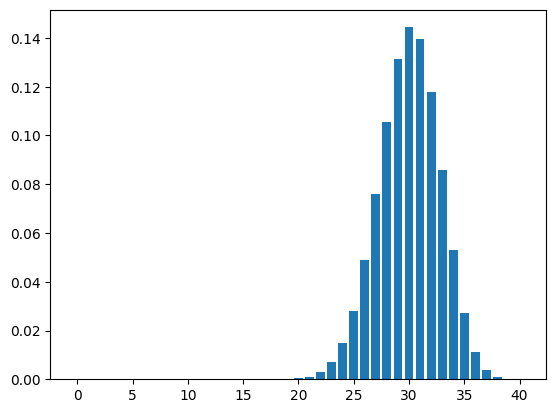

In [3]:
import matplotlib.pyplot as plt

# set  the values of x and prob
x = 40
prob = 0.75

# defining list of r values
r_values = list(range(x + 1))

# generate the "dist" variable by calling the binom.pmf() function below. this will be the list of pmf values
dist = [binom.pmf(r, x, prob) for r in r_values]

# Plotting the graph. Do not change. Used for grading
plots = plt.bar(r_values, dist)
xy = []
for plot in plots:
    xy.append(plot.get_xy())
plt.show()

Next, use Python's scipy.stats.binom package to get more insight of the situation. Find the cumulative density function to statistically calculate how much (in percent) will the physician be overbooked if we use the linear calculations from the first step to overbook patients.

In [4]:
# Fill in your linear prediction
linearPrediction = 40
workload = 30
prob = 0.75

# Find the amount overworked by calculating 1 - cdf(). Set the output to a variable called "overworked"
overworked = 1 - binom.cdf(workload, linearPrediction, prob)

In [5]:
print(overworked)

0.439539731672533


Finally, we can use the binomial ppf() function to find the number of appointments the physician should book if she wants to limit the risk of having more than 30 appointments per day to 5%

In [6]:
workload =30
prob = 0.75

# Target amount of overbooked patients
target = 0.05

# Set "total" = workload + ppf()
total = workload + binom.ppf(target, workload, 1-prob)

In [7]:
print(total)

34.0
